In [6]:
import sys
sys.path.append('/home/ZhiLi/CRESTHH')
from cresthh.anuga import SWW_plotter
import numpy as np
import pandas as pd
%matplotlib inline
import geopandas as gpd
from cresthh.utils import flowAreaCalc as flow_area
from cresthh.utils import processSWW
from cresthh import metrics as met
from cresthh import anuga
from netCDF4 import Dataset
from glob import glob
from osgeo import gdal
from pyproj import Proj, CRS, transform

# Allow inline jshtml animations
from matplotlib import rc
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
rc('animation', html='jshtml')

In [23]:
sys.path.append('/home/ZhiLi/PlotGallory')
from matplotlibconfig import basic
basic()

# 1D streamflow

In [47]:
OUTLET=(284219.573,3302832.615)
crosssection= gpd.read_file('/home/ZhiLi/CRESTHH/data/crosssection/08076700.shp')

In [48]:
benchmark= processSWW('Coupled_10m_modified_mesh.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
coupled_30m= processSWW('Coupled_30m_modified_mesh.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
noncoupled_10m= processSWW('nonCoupled_10m_modified_mesh.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
coupled_noConstraint=processSWW('Coupled_10m_no_constraint_mesh.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
coupled_FAM= processSWW('Coupled_10m_flow_acc_mesh.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
infil=processSWW('Coupled_10m_modified_mesh_infiltration.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
soil= processSWW('Coupled_10m_modified_mesh_Ksat.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))
saturated= processSWW('Coupled_10m_modified_mesh_saturated.sww', ['depth','speed','stage'], OUTLET, start_time=pd.to_datetime('20170825000000'))

Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot
Figure files for each frame will be stored in _plot


In [49]:
benchmark['area']= benchmark.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
noncoupled_10m['area']= noncoupled_10m.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
coupled_30m['area']= coupled_30m.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
coupled_FAM['area']= coupled_FAM.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
coupled_noConstraint['area']= coupled_noConstraint.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
infil['area']= infil.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
soil['area']= soil.apply(lambda x: flow_area(crosssection, x.stage), axis=1)
saturated['area']= saturated.apply(lambda x: flow_area(crosssection, x.stage), axis=1)

In [50]:
benchmark['Q']= benchmark.speed * benchmark.area
noncoupled_10m['Q']= noncoupled_10m.speed * noncoupled_10m.area
coupled_30m['Q']= coupled_30m.speed * coupled_30m.area
coupled_FAM['Q']= coupled_FAM.speed * coupled_FAM.area
coupled_noConstraint['Q']= coupled_noConstraint.speed * coupled_noConstraint.area
infil['Q']= infil.speed * infil.area
soil['Q']= soil.speed * soil.area
saturated['Q']= saturated.speed * saturated.area

In [192]:
coupledSplotter.triang.x.shape

(45194,)

In [193]:
from netCDF4 import Dataset
import matplotlib.tri as mtri
def interpolateSWW(swwfile, field, xi, yi):
    nc= Dataset(swwfile)
    if isinstance(field, str):
        if field=='depth':
            fea= nc['stage'][:].max(axis=0)- nc['elevation'][:]
    else:
        msg= 'not supported field'
        raise msg
        
#     interp_lin = mtri.CubicTriInterpolator(triang, z, kind='geom')
    triangles= nc['volumes'][:]
    x= nc['x'][:]
    y=nc['y'][:]
    triang= mtri.Triangulation(x, y, triangles)
    interp_lin = mtri.CubicTriInterpolator(triang, fea, kind='geom')
    xi,yi= np.meshgrid(xi,yi)
    zi_lin = interp_lin(xi, yi)
    
    return xi, yi, zi_lin

def interpolateSplotter(splotter,feature, xi, yi):

    if isinstance(field, str):
        if field=='depth':
            fea= nc['stage'][:].max(axis=0)- nc['elevation'][:]
    elif isinstance(field, np.ndarray):
        fea= feature
        
#     interp_lin = mtri.CubicTriInterpolator(triang, z, kind='geom')
    triangles= splotter.volumns
    x= splotter.x
    y= splotter.y
    triang= mtri.Triangulation(x, y, triangles)
    interp_lin = mtri.CubicTriInterpolator(triang, fea, kind='geom')
    xi,yi= np.meshgrid(xi,yi)
    zi_lin = interp_lin(xi, yi)
    
    return xi, yi, zi_lin
 

In [ ]:
boundary= gpd.read_file('/home/ZhiLi/mesher/examples/08076700_new/stream_dem/DEM_10m/line_DEM_10m.shp')
x= np.array(boundary.geometry[0].coords)[:,0]-benchmarkSplotter.xllcorner
y=np.array(boundary.geometry[0].coords)[:,1]-benchmarkSplotter.yllcorner

# Level 1: Model engine

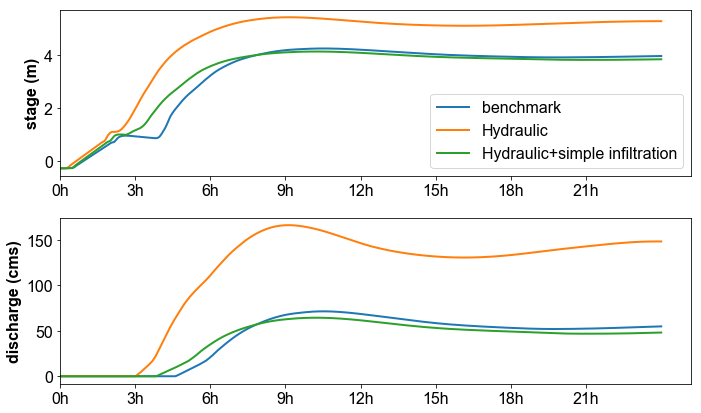

In [55]:
fig= plt.figure(figsize=(10,6))
ax= fig.add_subplot(211)
ax.plot(benchmark.stage.values, label='benchmark')
ax.plot(noncoupled_10m.stage.values, label='Hydraulic')
ax.plot(infil.stage.values, label='Hydraulic+simple infiltration')
ax.set_xticks(np.arange(0,24*30,3*30))
ax.set_xticklabels(['%dh'%i for i in np.arange(0,24,3)])
ax.set_xlim([0,None])
ax.set_ylabel('stage (m)')
plt.legend(fontsize=16);
ax= fig.add_subplot(212)
ax.plot(benchmark.Q.values, label='benchmark')
ax.plot(noncoupled_10m.Q.values, label='Hydraulic')
ax.plot(infil.Q.values, label='Hydraulic+simple infiltration')
ax.set_xticks(np.arange(0,24*30,3*30))
ax.set_xticklabels(['%dh'%i for i in np.arange(0,24,3)])
ax.set_xlim([0,None])
ax.set_ylabel('discharge (cms)');
# plt.xticks(np.arange(0,24,3), ['%dh'%i for i in np.arange(0,24,3)])


In [357]:
xi,yi,MD_benchmark= interpolate('Coupled_10m_modified_mesh.sww', np.arange(0,38000,10), np.arange(0,25000,10))
xi,yi,MD_estimator= interpolate('Coupled_10m_modified_mesh_infiltration.sww', np.arange(0,38000,10), np.arange(0,25000,10))

In [358]:
MD_benchmark=MD_benchmark.filled(np.nan)
MD_estimator=MD_estimator.filled(np.nan)

In [359]:
# MD_benchmark= MD_benchmark.filled(np.nan)
# MD_estimator= MD_benchmark.filled(np.nan)
new_field= np.zeros(MD_benchmark.shape)
rows,cols= np.where((MD_benchmark>0.2) & (MD_estimator>0.2) & (~np.isnan(MD_estimator)) & (~np.isnan(MD_benchmark)))
new_field[rows, cols]=3
rows,cols= np.where((MD_benchmark>0.2) & (MD_estimator<=0.2)& (~np.isnan(MD_estimator)) & (~np.isnan(MD_benchmark)))
new_field[rows, cols]=2
rows,cols= np.where((MD_benchmark<=0.2) & (MD_estimator>0.2)& (~np.isnan(MD_estimator)) & (~np.isnan(MD_benchmark)))
new_field[rows, cols]=1

new_field[np.isnan(MD_benchmark)]=np.nan

# new_field[mask_misses]=2
# new_field[mask_false]=1

hits_p= float((new_field==3).sum())/((~np.isnan(new_field)).sum())*100.
misses_p= float((new_field==2).sum())/((~np.isnan(new_field)).sum())*100.
false_p= float((new_field==1).sum())/((~np.isnan(new_field)).sum())*100.
neg_p = float((new_field==0).sum())/((~np.isnan(new_field)).sum())*100.

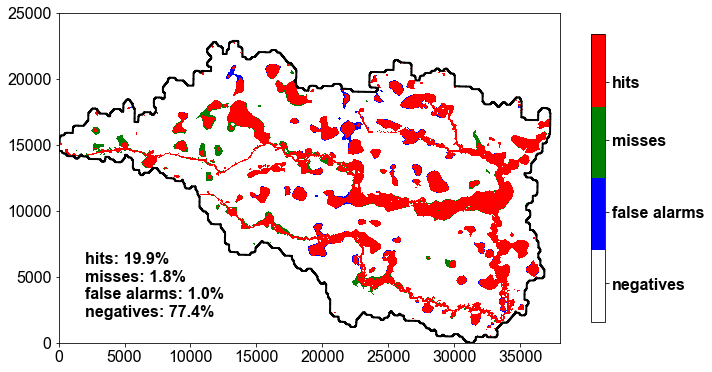

In [360]:
cmap = ListedColormap(['white', 'b', 'g', 'r'])
fig=plt.figure(figsize=(10,6))
# estimator.triang.set_mask(estimator.depth.max(axis=0) <=0.2)
plt.imshow(new_field, origin='lower left', cmap=cmap, extent=[xi.min(), xi.max(),yi.min(),yi.max()])
cbar= plt.colorbar(ticks=[0.4,1.15,1.9,2.5], shrink=0.7)
# cbar.ax.set_yticks([1.25,2.00,2.75])
cbar.ax.set_yticklabels(['negatives','false alarms','misses','hits'], weight='bold')
plt.text(2000,2000,'hits: %.1f%s\nmisses: %.1f%s\nfalse alarms: %.1f%s\nnegatives: %.1f%s'%(hits_p,'%', misses_p,'%', false_p,'%', 100-hits_p-misses_p-false_p,'%'), fontsize=16, weight='bold')
plt.plot(x, y, 'k');

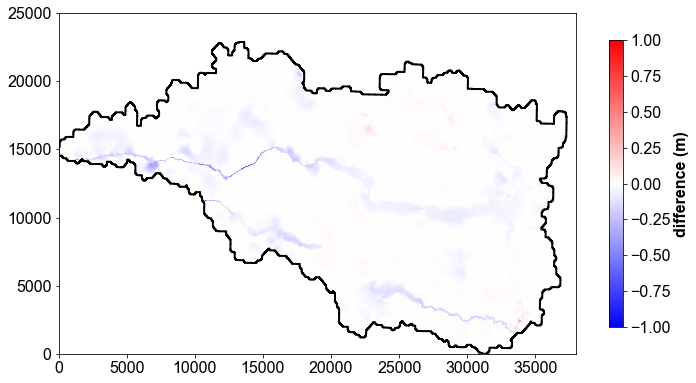

In [361]:
difference= MD_estimator- MD_benchmark
fig=plt.figure(figsize=(10,6))
plt.imshow(difference, origin='lower left', cmap='bwr', vmin=-1, vmax=1, extent=[xi.min(), xi.max(),yi.min(),yi.max()])
cbar= plt.colorbar(shrink=0.7)
cbar.ax.set_ylabel('difference (m)')
plt.plot(x, y, 'k');

In [7]:
coupledSplotter= SWW_plotter('Coupled_10m_modified_mesh.sww', start_time=pd.to_datetime('20170825000000'))

Figure files for each frame will be stored in _plot


In [8]:
infiltrationSplotter= SWW_plotter('Coupled_10m_modified_mesh_infiltration.sww', start_time=pd.to_datetime('20170825000000'))

Figure files for each frame will be stored in _plot


In [40]:
noncoupledSplotter=SWW_plotter('nonCoupled_10m_modified_mesh.sww', start_time=pd.to_datetime('20170825000000'))

Figure files for each frame will be stored in _plot


In [67]:
infiltration_rate= np.zeros(coupledSplotter.exc_rain.shape[0])
infiltration_rate[2:62]= 100-coupledSplotter.exc_rain[2:62,:].mean(axis=1) * 3600 *1000

In [68]:
infiltration_rate_infiltration= np.zeros(infiltrationSplotter.exc_rain.shape[0])
infiltration_rate_infiltration[2:62]= 100-infiltrationSplotter.exc_rain[2:62,:].mean(axis=1) * 3600 *1000

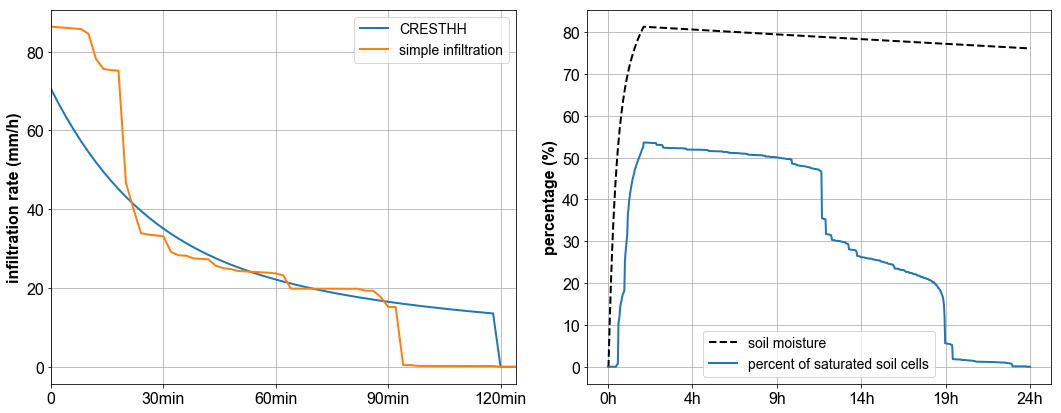

In [90]:
fig= plt.figure(figsize=(15,6))
ax=fig.add_subplot(121)
ax.plot(infiltration_rate[2:], label='CRESTHH')
ax.plot(infiltration_rate_infiltration[2:],label='simple infiltration')
ax.set_ylabel('infiltration rate (mm/h)')
ax.set_xlim([0,62])
ax.set_xticks(np.linspace(0,60,5))
ax.set_xticklabels(['0', '30min','60min','90min','120min'])
plt.legend()
plt.grid()
ax= fig.add_subplot(122)
ax.plot(new.SM.mean(axis=1),'k--',label='soil moisture')
# ax2 = ax.twinx()
num_saturated= new.SM>95
ax.plot(num_saturated.sum(axis=1)/float(new.SM.shape[1])*100., label='percent of saturated soil cells')
# ax2.set_ylabel('percent of saturated soils (%)')
ax.set_ylabel('percentage (%)')
ax.set_xticks(np.linspace(0,30*24,6))
ax.set_xticklabels(['%dh'%m for m in np.linspace(0,24,6)])
ax.legend()
plt.grid();
# ax.set_xticks(np.linspace(0,60,5))
# ax.set_xticklabels(['0', '0.5h','1h','1.5h','2h']);

In [62]:
new= SWW_plotter('Coupled_10m_new.sww', start_time=pd.to_datetime('20170825000000'))

Figure files for each frame will be stored in _plot


In [3]:
import geopandas as gpd
pnt_1= (283408,3312171)
pnt_2= (283224.0657,3312235.3973)
pnt_3= (284210.7,3303059.5)
pnt_4= (283875.9465,3303052.9056)
cross_1= gpd.read_file('/home/ZhiLi/CRESTHH/data/crosssection/trib_1.shp')
cross_2= gpd.read_file('/home/ZhiLi/CRESTHH/data/crosssection/trib_2.shp')
cross_3= gpd.read_file('/home/ZhiLi/CRESTHH/data/crosssection/trib_3.shp')
cross_4= gpd.read_file('/home/ZhiLi/CRESTHH/data/crosssection/trib_4.shp')

In [9]:
cross= [cross_1, cross_2, cross_3, cross_4]

In [41]:
discharges= []
for i, point in enumerate([pnt_1, pnt_2, pnt_3, pnt_4]):
    xc= noncoupledSplotter.xc + noncoupledSplotter.xllcorner
    yc= noncoupledSplotter.yc + noncoupledSplotter.yllcorner
    iloc= np.argmin((xc-pnt_1[0])**2 + (yc-pnt_1[1])**2)
    _stages= noncoupledSplotter.stage[:,iloc]
    _speeds= noncoupledSplotter.speed[:,iloc]
    _areas= np.array([flow_area(cross[i], _stage) for _stage in _stages])
    _discharge= _areas * _speeds
    discharges.append(_discharge)

In [37]:
import copy
discharge_coupled= copy.deepcopy(discharges)

In [39]:
discharge_infiltration= copy.deepcopy(discharges)

In [42]:
discharge_noncoupled= copy.deepcopy(discharges)

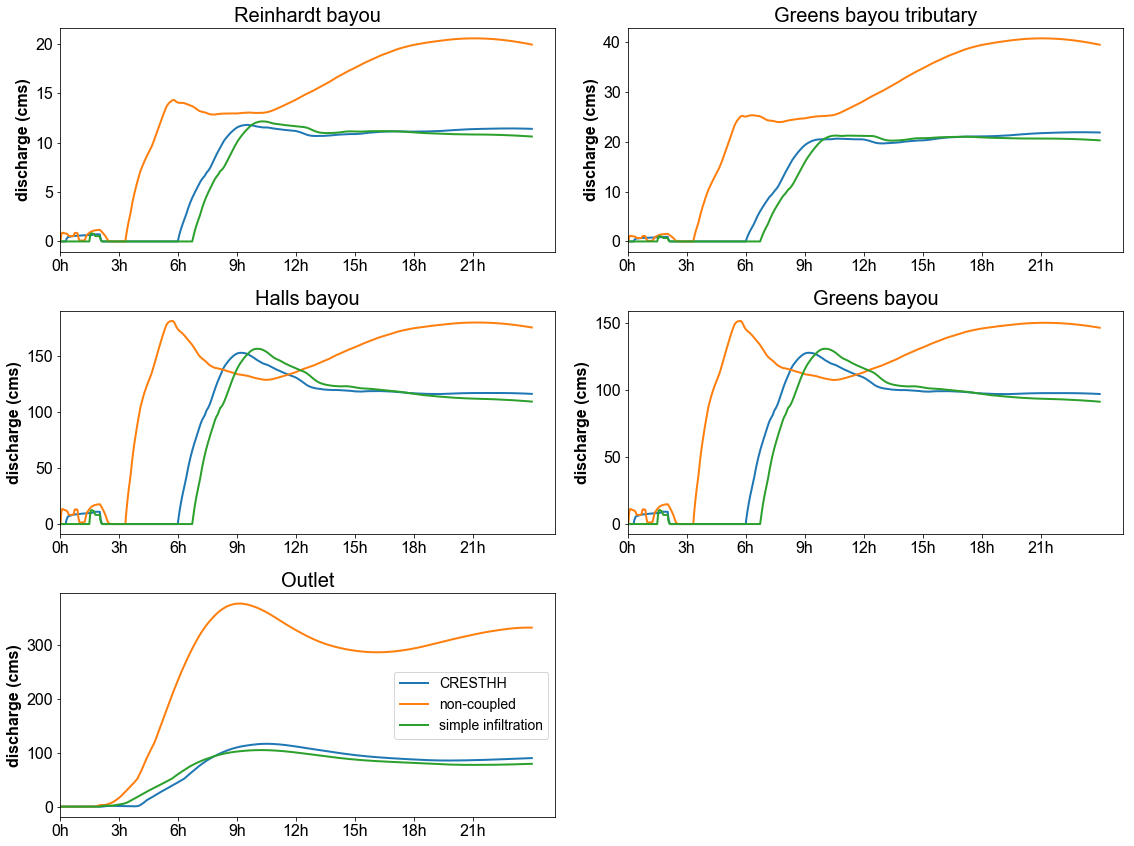

In [100]:
labels= ['tributary 1', 'tributary 2', 'tributary 3', 'tributary 4']
fig= plt.figure(figsize=(16,12))
ax= fig.add_subplot(321)
ax.plot(discharge_coupled[0], label='CRESTHH')
ax.plot(discharge_noncoupled[0], label='non-coupled')
ax.plot(discharge_infiltration[0], label='simple infiltration')
ax.set_title('Reinhardt bayou')
# ax.plot(benchmark.Q.values, label='outlet')
ax.set_ylabel('discharge (cms)')
ax.set_xticks(np.arange(0,24*30,3*30))
ax.set_xticklabels(['%dh'%i for i in np.arange(0,24,3)])
ax.set_xlim([0,None])

ax= fig.add_subplot(322)
ax.plot(discharge_coupled[1], label='CRESTHH')
ax.plot(discharge_noncoupled[1], label='non-coupled')
ax.plot(discharge_infiltration[1], label='simple infiltration')
ax.set_title('Greens bayou tributary')
# ax.plot(benchmark.Q.values, label='outlet')
ax.set_ylabel('discharge (cms)')
ax.set_xticks(np.arange(0,24*30,3*30))
ax.set_xticklabels(['%dh'%i for i in np.arange(0,24,3)])
ax.set_xlim([0,None])

ax= fig.add_subplot(323)
ax.plot(discharge_coupled[2], label='CRESTHH')
ax.plot(discharge_noncoupled[2], label='non-coupled')
ax.plot(discharge_infiltration[2], label='simple infiltration')
ax.set_title('Halls bayou')
# ax.plot(benchmark.Q.values, label='outlet')
ax.set_ylabel('discharge (cms)')
ax.set_xticks(np.arange(0,24*30,3*30))
ax.set_xticklabels(['%dh'%i for i in np.arange(0,24,3)])
ax.set_xlim([0,None])

ax= fig.add_subplot(324)
ax.plot(discharge_coupled[3], label='CRESTHH')
ax.plot(discharge_noncoupled[3], label='non-coupled')
ax.plot(discharge_infiltration[3], label='simple infiltration')
ax.set_title('Greens bayou')
# ax.plot(benchmark.Q.values, label='outlet')
ax.set_ylabel('discharge (cms)')
ax.set_xticks(np.arange(0,24*30,3*30))
ax.set_xticklabels(['%dh'%i for i in np.arange(0,24,3)])
ax.set_xlim([0,None])

ax= fig.add_subplot(325)
ax.plot(benchmark.Q.values, label='CRESTHH')
ax.plot(noncoupled_10m.Q.values, label='non-coupled')
ax.plot(infil.Q.values, label='simple infiltration')
ax.set_title('Outlet')
# ax.plot(benchmark.Q.values, label='outlet')
ax.set_ylabel('discharge (cms)')
ax.set_xticks(np.arange(0,24*30,3*30))
ax.set_xticklabels(['%dh'%i for i in np.arange(0,24,3)])
ax.set_xlim([0,None])

plt.legend();

# discharge grids

In [184]:
crosssections= gpd.read_file('/home/ZhiLi/CRESTHH/data/crosssection/batch.shp')

In [185]:
def sample_points_from_line(line, samples):
    llcorner= np.array(line.geometry.coords)[0]
    urcorner= np.array(line.geometry.coords)[1]
    x= np.linspace(llcorner[0], urcorner[0],samples)
    y= np.linspace(llcorner[1], urcorner[1],samples)
    values= line.iloc[3:-1].values
    
    return x, y, values

In [201]:
def make_Q_grids(splotter,crosssections):
    tsize= len(splotter.depth)
    Q_grid= np.zeros((tsize, len(splotter.x)))
    for i in range(len(crosssections)):

        section= crosssections.iloc[i]
        x,y,elev= sample_points_from_line(section,20)
        xc= splotter.x + splotter.xllcorner
        yc= splotter.y + splotter.yllcorner
        spacing= ((x[1]-x[0])**2 + (y[1]-y[0])**2)**.5
        iloc= np.argmin((xc-x.mean())**2 + (yc-y.mean())**2)
        for it in range(splotter.depth.shape[0]):
            _stage= splotter.stage[it,iloc]
            _speed= splotter.speed[it,iloc]
            _mask= np.where(elev<_stage)[0]
            _area= ((_stage-elev[_mask]) * spacing).sum()
            Q_grid[it,iloc]=_area*_speed
    return Q_grid
        
    

In [ ]:
Q_grid= make_Q_grids(coupledSplotter, crosssections)

In [ ]:
Q_grid.shape

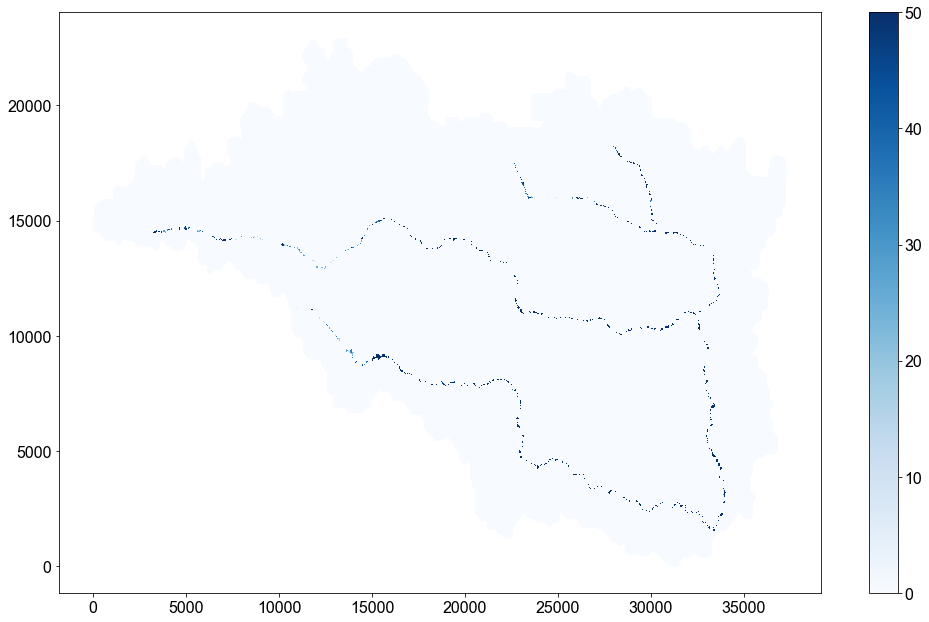

In [188]:
plt.tripcolor(coupledSplotter.triang,
           facecolors=Q_grid.max(axis=0),
             vmin=0, vmax=50,
             cmap='Blues')
plt.colorbar()

In [29]:
for i in range(48):
    coupledSplotter.save_depth_frame(frame=i*15,vmin=0, vmax=5)

# Level 2: Mesh

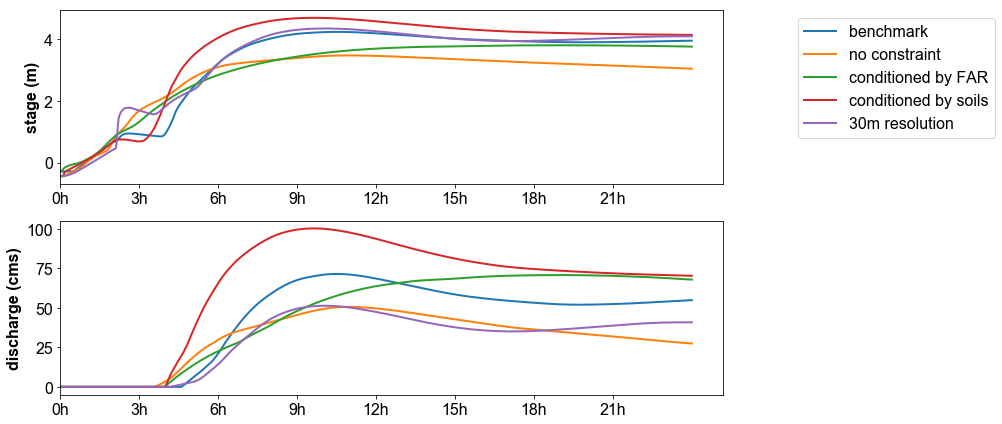

In [197]:
fig= plt.figure(figsize=(14,6))
ax= fig.add_subplot(211)
ax.plot(benchmark.stage.values, label='benchmark')
ax.plot(coupled_noConstraint.stage.values, label='no constraint')
ax.plot(coupled_FAM.stage.values, label='conditioned by FAR')
ax.plot(soil.stage.values, label='conditioned by soils')
ax.plot(coupled_30m.stage.values, label='30m resolution')
ax.set_xticks(np.arange(0,24*30,3*30))
ax.set_xticklabels(['%dh'%i for i in np.arange(0,24,3)])
ax.set_xlim([0,None])
ax.set_ylabel('stage (m)')
plt.legend(fontsize=16, bbox_to_anchor=(1.1,1));
ax= fig.add_subplot(212)
ax.plot(benchmark.Q.values, label='benchmark')
ax.plot(coupled_noConstraint.Q.values, label='no constraint')
ax.plot(coupled_FAM.Q.values, label='conditioned by FAR')
ax.plot(soil.Q.values, label='conditioned by soils')
ax.plot(coupled_30m.Q.values, label='30m resolution')
ax.set_xticks(np.arange(0,24*30,3*30))
ax.set_xticklabels(['%dh'%i for i in np.arange(0,24,3)])
ax.set_xlim([0,None])
ax.set_ylabel('discharge (cms)');
# plt.xticks(np.arange(0,24,3), ['%dh'%i for i in np.arange(0,24
,3)]);


In [344]:
xi,yi,MD_benchmark= interpolate('Coupled_10m_modified_mesh.sww', np.arange(0,38000,10), np.arange(0,25000,10))
xi,yi,MD_estimator= interpolate('Coupled_10m_modified_mesh_Ksat.sww', np.arange(0,38000,10), np.arange(0,25000,10))

In [345]:
MD_benchmark=MD_benchmark.filled(np.nan)
MD_estimator=MD_estimator.filled(np.nan)

In [346]:
# MD_benchmark= MD_benchmark.filled(np.nan)
# MD_estimator= MD_benchmark.filled(np.nan)
new_field= np.zeros(MD_benchmark.shape)
rows,cols= np.where((MD_benchmark>0.2) & (MD_estimator>0.2) & (~np.isnan(MD_estimator)) & (~np.isnan(MD_benchmark)))
new_field[rows, cols]=3
rows,cols= np.where((MD_benchmark>0.2) & (MD_estimator<=0.2)& (~np.isnan(MD_estimator)) & (~np.isnan(MD_benchmark)))
new_field[rows, cols]=2
rows,cols= np.where((MD_benchmark<=0.2) & (MD_estimator>0.2)& (~np.isnan(MD_estimator)) & (~np.isnan(MD_benchmark)))
new_field[rows, cols]=1

new_field[np.isnan(MD_benchmark)]=np.nan

# new_field[mask_misses]=2
# new_field[mask_false]=1

hits_p= float((new_field==3).sum())/((~np.isnan(new_field)).sum())*100.
misses_p= float((new_field==2).sum())/((~np.isnan(new_field)).sum())*100.
false_p= float((new_field==1).sum())/((~np.isnan(new_field)).sum())*100.
neg_p = float((new_field==0).sum())/((~np.isnan(new_field)).sum())*100.

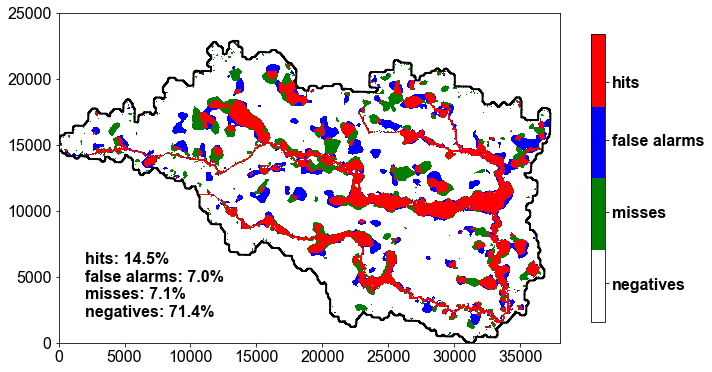

In [347]:
cmap = ListedColormap(['white', 'b', 'g', 'r'])
fig=plt.figure(figsize=(10,6))
# estimator.triang.set_mask(estimator.depth.max(axis=0) <=0.2)
plt.imshow(new_field, origin='lower left', cmap=cmap, extent=[xi.min(), xi.max(),yi.min(),yi.max()])
cbar= plt.colorbar(ticks=[0.4,1.15,1.9,2.5], shrink=0.7)
# cbar.ax.set_yticks([1.25,2.00,2.75])
cbar.ax.set_yticklabels(['negatives','false alarms','misses','hits'], weight='bold')
plt.text(2000,2000,'hits: %.1f%s\nmisses: %.1f%s\nfalse alarms: %.1f%s\nnegatives: %.1f%s'%(hits_p,'%', misses_p,'%', false_p,'%', 100-hits_p-misses_p-false_p,'%'), fontsize=16, weight='bold')
plt.plot(x, y, 'k');

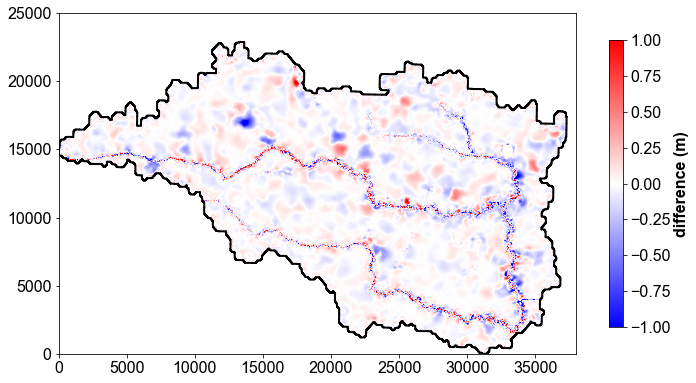

In [348]:
difference= MD_estimator- MD_benchmark
fig=plt.figure(figsize=(10,6))
plt.imshow(difference, origin='lower left', cmap='bwr', vmin=-1, vmax=1, extent=[xi.min(), xi.max(),yi.min(),yi.max()])
cbar= plt.colorbar(shrink=0.7)
cbar.ax.set_ylabel('difference (m)')
plt.plot(x, y, 'k');

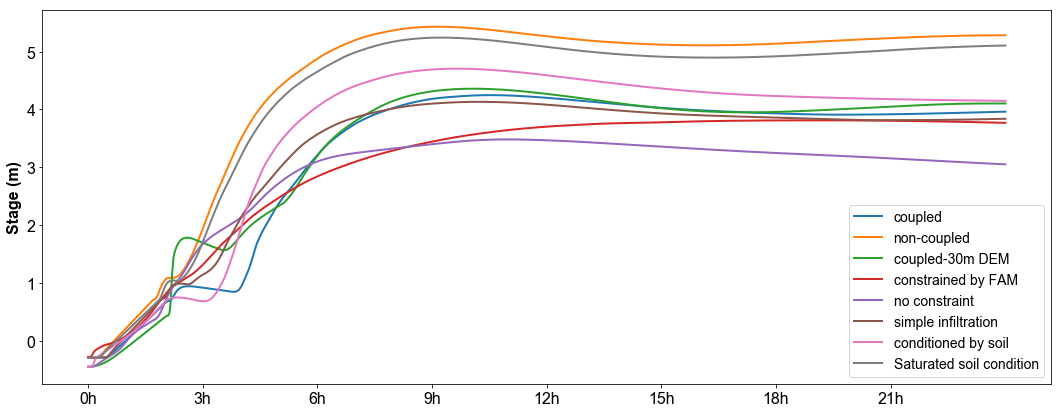

In [51]:
plt.figure(figsize=(15,6))
plt.plot(benchmark.stage.values, label='coupled')
plt.plot(noncoupled_10m.stage.values, label='non-coupled')
plt.plot(coupled_30m.stage.values, label='coupled-30m DEM')
plt.plot(coupled_FAM.stage.values,label='constrained by FAM')
plt.plot(coupled_noConstraint.stage.values,label='no constraint')
plt.plot(infil.stage.values, label='simple infiltration')
plt.plot(soil.stage.values, label='conditioned by soil')
plt.plot(saturated.stage.values, label='Saturated soil condition')
plt.xticks(np.arange(0,24*30,3*30),['%dh'%i for i in np.arange(0,24,3)] )
plt.ylabel('Stage (m)')
plt.legend();

In [52]:
crest= pd.read_csv('../calibration/ts.08076700.crest.csv')

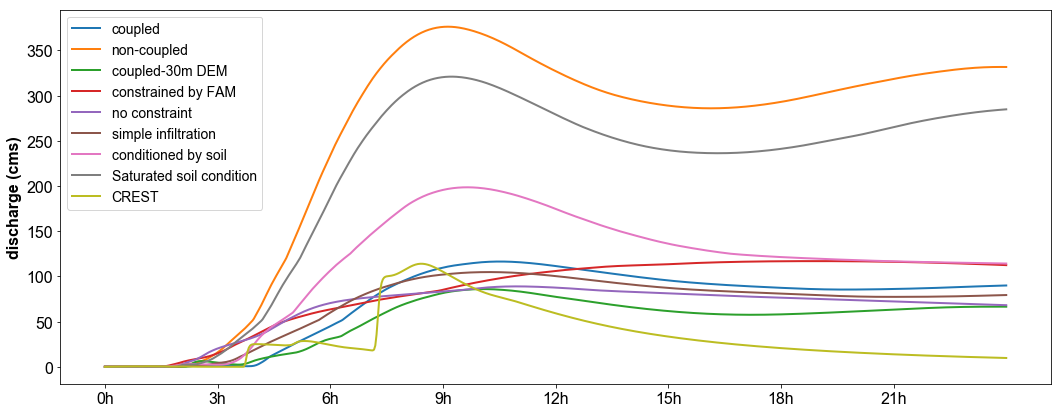

In [55]:
plt.figure(figsize=(15,6))
plt.plot(benchmark.Q.values, label='coupled')
plt.plot(noncoupled_10m.Q.values, label='non-coupled')
plt.plot(coupled_30m.Q.values, label='coupled-30m DEM')
plt.plot(coupled_FAM.Q.values,label='constrained by FAM')
plt.plot(coupled_noConstraint.Q.values,label='no constraint')
plt.plot(infil.Q.values, label='simple infiltration')
plt.plot(soil.Q.values, label='conditioned by soil')
plt.plot(saturated.Q.values, label='Saturated soil condition')
plt.plot(np.append(0, crest.iloc[:,1].values*.1),label='CREST')
plt.xticks(np.arange(0,24*30,3*30),['%dh'%i for i in np.arange(0,24,3)] )
plt.ylabel('discharge (cms)')
plt.legend();